In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)
X,y=mnist.data,mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
print(X.shape)
print(y)
print(y.shape)

(70000, 784)
['5' '0' '4' ... '4' '5' '6']
(70000,)


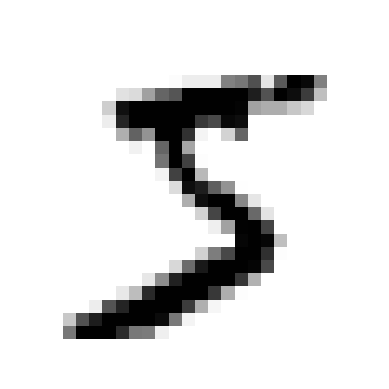

5


In [3]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap="binary")
  plt.axis("off")
  plt.show()

some_digit=X[0]
plot_digit(some_digit)
print(y[0])


In [4]:
X_train,Xtest,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [5]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [9]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm


array([[53892,   687],
       [ 1891,  3530]])

In [12]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [13]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [14]:
y_score=sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [15]:
thresh=0
y_some_digit_pred=(y_score>thresh)
print(y_some_digit_pred)
thresh=3000
y_some_digit_pred=(y_score>thresh)
print(y_some_digit_pred)


[ True]
[False]


<function matplotlib.pyplot.show(close=None, block=None)>

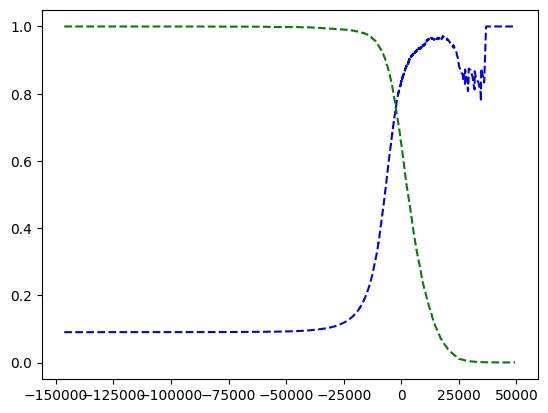

In [16]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)
plt.plot(thresholds,precisions[:-1],"b--",label="precision")
plt.plot(thresholds,recalls[:-1],"g--",label="recall")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

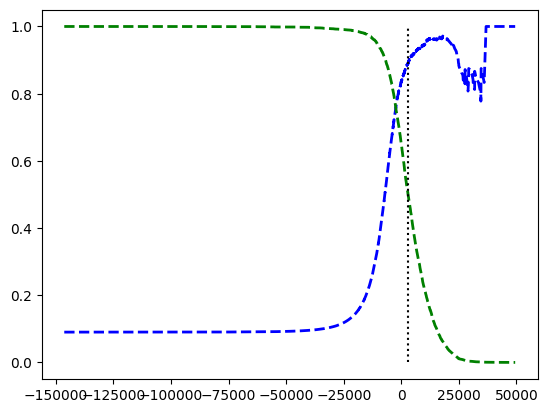

In [17]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)
plt.plot(thresholds,precisions[:-1],"b--",label="precision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g--",label="recall",linewidth=2)
plt.vlines(thresh,0,1.0,"k","dotted",label="threshold")
plt.show

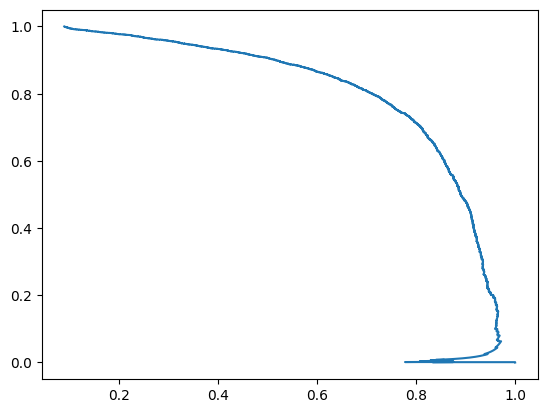

In [18]:
plt.plot(precisions,recalls)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [20]:
y_probas_forest[:,1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [21]:
y_score_forest=y_probas_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_5,y_score_forest)

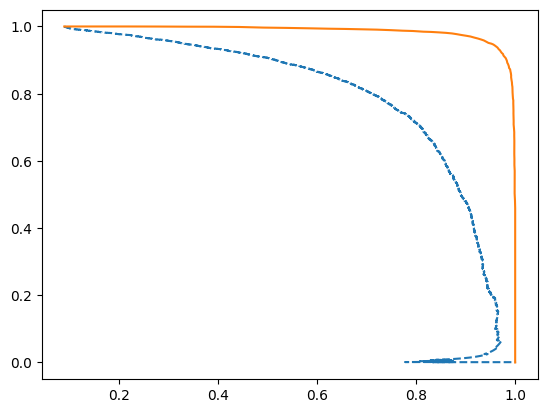

In [22]:
plt.plot(precisions,recalls,"--")
plt.plot(precisions_forest,recalls_forest)
plt.show()

In [23]:
y_train_pred_forest=y_probas_forest[:,1]>=0.4
print(f1_score(y_train_5,y_train_pred_forest))

0.9463710441538753


In [24]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [25]:
svm_clf.predict([some_digit])


array(['5'], dtype=object)

In [26]:
digits_score=svm_clf.decision_function([some_digit])
digits_score.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [27]:
class_id=digits_score.argmax()
class_id

5

In [28]:
print(svm_clf.classes_)
svm_clf.classes_[class_id]

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


'5'

In [29]:
y_out=svm_clf.predict(X_train[:2000])

In [30]:
f1_score(y_train[:2000],y_out,average="weighted")

0.9815019295934353

In [31]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [32]:
f1_score(y_train[:2000],ovr_clf.predict(X_train[:2000]),average="weighted")
cross_val_score(ovr_clf,X_train[:2000],y_train[:2000],cv=3,scoring="accuracy")

array([0.91454273, 0.88455772, 0.93693694])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype("int"))
cross_val_score(ovr_clf,X_train_scaled[:2000],y_train[:2000],cv=3,scoring="accuracy")

array([0.88005997, 0.83808096, 0.9009009 ])

In [34]:
print(cross_val_score(svm_clf,X_train[:2000],y_train[:2000],cv=3,scoring="accuracy"))
print(cross_val_score(ovr_clf,X_train[:2000],y_train[:2000],cv=3,scoring="accuracy"))
print(cross_val_score(ovr_clf,X_train_scaled[:2000],y_train[:2000],cv=3,scoring="accuracy"))


[0.91754123 0.89955022 0.93693694]
[0.91454273 0.88455772 0.93693694]
[0.88005997 0.83808096 0.9009009 ]


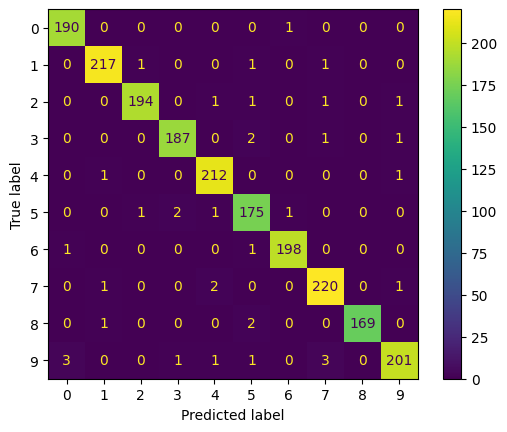

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train[:2000],svm_clf.predict(X_train[:2000]))
plt.show()


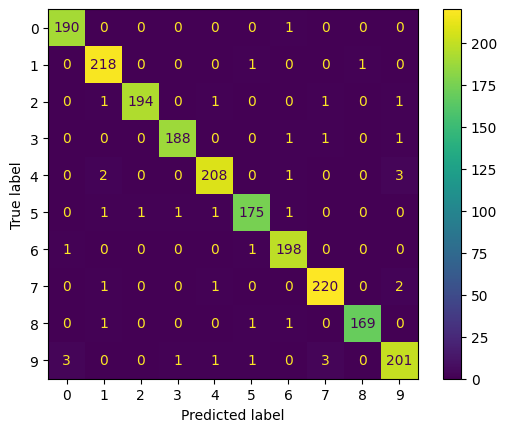

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000],ovr_clf.predict(X_train[:2000]))
plt.show()

In [37]:
svm_clf.fit(X_train,y_train)

SVC(random_state=42)

In [38]:
y_train_pred=svm_clf.predict(X_train)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()


KeyboardInterrupt: 

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()
